# Requirements

In [1]:
import sympy

# Introduction

These are solutions using Python to some of the problems in "Introduction to quantum mechanics" by David J. Griffith and Darell F. Schroeter, Cambridge University Press, 2018.

# Problem 1.4

Consider the following wave function:
$$
    \Psi(x) = \begin{cases}
        A \frac{x}{a} & 0 \le x \le a \\
        A \frac{b - x}{b - a} & a \le x \le b \\
        0 & \mathrm{otherwise}
    \end{cases}
$$

We define the constants $A$, $a$ and $b$ which are all positive, as well as the variable $x$.  Note that it is clear that $a \le b$, but unfortunately, we can not impose this kind of relational assumption on sympy symbols.

In [2]:
A, a, b = sympy.symbols('A a b', positive=True)
x = sympy.symbols('x')

Now we can define the piecewise function $\Psi(x)$.

In [4]:
Ψ = sympy.Piecewise(
    (0, x < 0),
    (A*x/a, x < a),
    (A*(b - x)/(b - a), x < b),
    (0, b < x)
)

For given values of $A$, $a$ and $b$, we can easily plot the function.

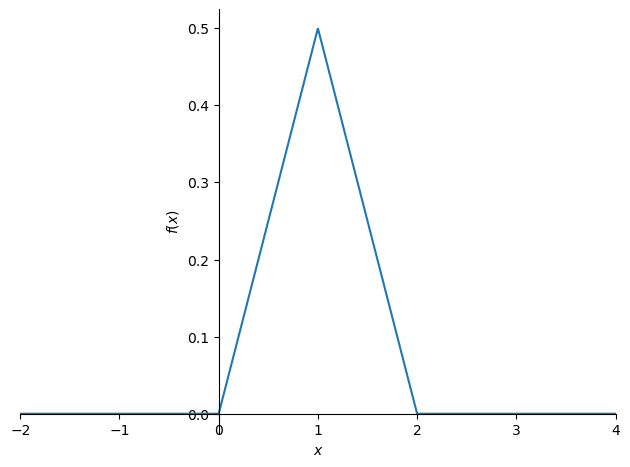

In [20]:
sympy.plot(Ψ.subs({
    a: 1,
    b: 2,
    A: 0.5,
}), xlim=(-2, 4));

Since there is (currently) no way to impose that $a < b$, we will simply set $b = 2a$.

In [30]:
Ψ = Ψ.subs(b, 2*a)

## Normalization (a)

As $\Psi$ is interpreted as a wave function, it should be normalized, i.e,
$$
    \int_{-\infty}^{+\infty} | \Psi^2 | dx = 1
$$

In [25]:
expr = sympy.integrate((Ψ**2).subs(b, 2*a), (x, -sympy.oo, sympy.oo))

In [26]:
expr

2*A**2*a/3

Solving for $A$ in this expression will yield a proper normalization in terms of $a$.

In [34]:
norm = sympy.solve(expr - 1, A)[0]

In [37]:
Ψ = Ψ.subs(A, norm)

Verifying the normalization shows that the choice for $A$'s value was appropriate.

In [39]:
sympy.integrate(Ψ**2, (x, -sympy.oo, sympy.oo))

1

## Plot (b)

We plot the normalized function $\Psi(x)$ below.

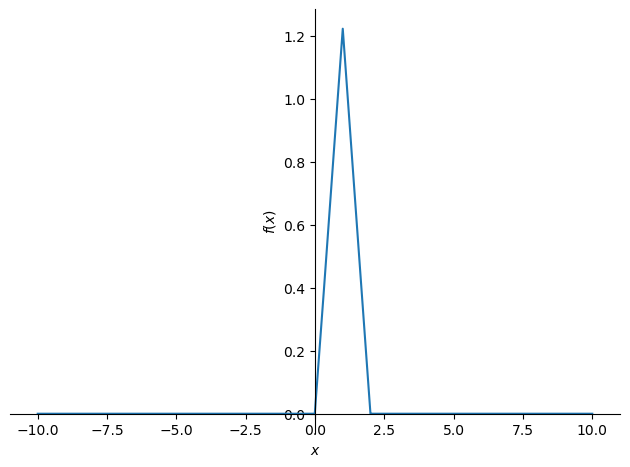

In [40]:
sympy.plot(Ψ.subs(a, 1));

## Probability (d)

We should integrate the norm of the wave equation for $-\infty < x \le a$.
$$
    P(x \le a) = \int_{-\infty}^{a} | \Psi^2 | dx
$$

In [41]:
sympy.integrate(Ψ**2, (x, -sympy.oo, a))

1/2

## Expectation value of $x$ (e)

We compute
$$
    \langle x \rangle = \int_{-\infty}^{infty} x | \Psi^2 | dx
$$

In [42]:
sympy.integrate(x*Ψ**2, (x, -sympy.oo, sympy.oo))

a